# ASSIGNMENT 2

#### Importing Libraries and Packages

In [1]:
#Importing Libraries and Packages
import pandas as pan
import numpy as npy
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

## TASK 1: Problem Formulation, Data Acquisition and Data Preparation

In [2]:
#Loading the Dataset

trip = pan.read_csv("LasVegasTrip.csv")

In [3]:
#Printing Values
pan.read_csv("LasVegasTrip.csv")

,User_country,No_of_reviews,No_of_hotelreviews,Helpful_votes,Score,Period_of_stay,Traveler_type,Pool,Gym,Tennis_court,Spa,Casino,Free_internet,Hotel_name,hotelstar,No_of_rooms,User_continent,Member_years,Review_month,Review_weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,9.0,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,3.0,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,2.0,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,Europe,6.0,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,7.0,March,Tuesday
5,Canada,31,8,27,3,Mar-May,Couples,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,2.0,March,Tuesday
6,UK,45,12,46,4,Mar-May,Couples,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,Europe,4.0,April,Friday
7,USA,2,1,4,4,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,0.0,April,Tuesday
8,India,24,3,8,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,Asia,3.0,May,Saturday
9,Canada,12,7,11,3,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,5.0,May,Tuesday


In [4]:
#Finding sum of all Null Values

trip.isnull().sum()

User_country           0
No_of_reviews          0
No_of_hotelreviews     0
Helpful_votes          0
Score                  0
Period_of_stay         0
Traveler_type          0
Pool                   0
Gym                    0
Tennis_court           0
Spa                    0
Casino                 0
Free_internet          0
Hotel_name             0
hotelstar              0
No_of_rooms           96
User_continent        96
Member_years          96
Review_month          96
Review_weekday        96
dtype: int64

In [5]:
#Dropping all Null Values
trip = trip.dropna()

In [6]:
#Printing values after dropping
trip.isnull().sum()

User_country          0
No_of_reviews         0
No_of_hotelreviews    0
Helpful_votes         0
Score                 0
Period_of_stay        0
Traveler_type         0
Pool                  0
Gym                   0
Tennis_court          0
Spa                   0
Casino                0
Free_internet         0
Hotel_name            0
hotelstar             0
No_of_rooms           0
User_continent        0
Member_years          0
Review_month          0
Review_weekday        0
dtype: int64

In [7]:
#Printing Data Types
trip.dtypes

User_country           object
No_of_reviews           int64
No_of_hotelreviews      int64
Helpful_votes           int64
Score                   int64
Period_of_stay         object
Traveler_type          object
Pool                   object
Gym                    object
Tennis_court           object
Spa                    object
Casino                 object
Free_internet          object
Hotel_name             object
hotelstar               int64
No_of_rooms           float64
User_continent         object
Member_years          float64
Review_month           object
Review_weekday         object
dtype: object

In [8]:
#Converting dataypes
trip[['No_of_rooms']] = trip[['No_of_rooms']].astype('int64')
trip[['hotelstar']] = trip[['hotelstar']].astype('object')
trip['Member_years'] = trip['Member_years'].astype('int64')

In [9]:
#Printing Datatypes after converting
trip.dtypes

User_country          object
No_of_reviews          int64
No_of_hotelreviews     int64
Helpful_votes          int64
Score                  int64
Period_of_stay        object
Traveler_type         object
Pool                  object
Gym                   object
Tennis_court          object
Spa                   object
Casino                object
Free_internet         object
Hotel_name            object
hotelstar             object
No_of_rooms            int64
User_continent        object
Member_years           int64
Review_month          object
Review_weekday        object
dtype: object

In [10]:
trip.iloc[:, 18].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [11]:
trip.iloc[:, 19].unique()

array(['Thursday', 'Friday', 'Saturday', 'Tuesday', 'Wednesday', 'Sunday',
       'Monday'], dtype=object)

In [12]:
#Descriptive Statistics for Numerical columns
trip.describe()

,No_of_reviews,No_of_hotelreviews,Helpful_votes,Score,No_of_rooms,Member_years
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,43.848039,14.764706,29.767157,4.083333,2540.529412,-0.068627
std,72.075080,23.086283,46.142629,1.019667,1177.605288,89.674624
min,1.000000,0.000000,0.000000,1.000000,315.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,1467.000000,2.000000
50%,22.000000,9.000000,16.000000,4.000000,2916.000000,4.000000
75%,47.250000,17.000000,31.000000,5.000000,3348.000000,7.000000
max,775.000000,263.000000,365.000000,5.000000,4027.000000,13.000000


In [13]:
#Descriptive Statistics for Object columns
trip.describe(include = npy.object)

,User_country,Period_of_stay,Traveler_type,Pool,Gym,Tennis_court,Spa,Casino,Free_internet,Hotel_name,hotelstar,User_continent,Review_month,Review_weekday
count,408,408,408,408,408,408,408,408,408,408,408,408,408,408
unique,43,4,5,2,1,2,2,2,2,17,3,6,12,7
top,USA,Mar-May,Couples,YES,YES,NO,YES,YES,YES,Trump International Hotel Las Vegas,5,North America,July,Sunday
freq,172,104,179,384,408,312,360,384,384,24,192,232,34,64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B1ED690>,
      dtype=object)

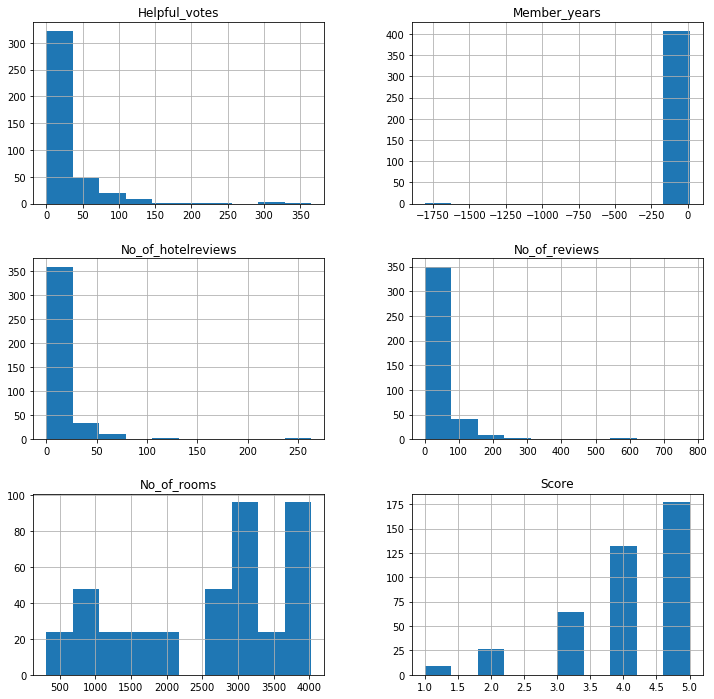

In [14]:
#Histograms are shown for all Numerical columns
trip.hist(column = ["No_of_reviews", "No_of_hotelreviews", "Helpful_votes", "Score", "No_of_rooms", "Member_years"], figsize = (12,12))

In [15]:
trip.to_csv("new.csv", index = False)

In [16]:
lv = pan.read_csv("new.csv")

In [17]:
pan.read_csv("new.csv")

,User_country,No_of_reviews,No_of_hotelreviews,Helpful_votes,Score,Period_of_stay,Traveler_type,Pool,Gym,Tennis_court,Spa,Casino,Free_internet,Hotel_name,hotelstar,No_of_rooms,User_continent,Member_years,Review_month,Review_weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday
5,Canada,31,8,27,3,Mar-May,Couples,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,March,Tuesday
6,UK,45,12,46,4,Mar-May,Couples,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,4,April,Friday
7,USA,2,1,4,4,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,0,April,Tuesday
8,India,24,3,8,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Asia,3,May,Saturday
9,Canada,12,7,11,3,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,5,May,Tuesday


### Feature Importance

In [18]:
#Defining All Categorical Columns
categorical = list(trip.select_dtypes(include = ['object']).columns.values)

In [19]:
#Printing Categorical Columns
categorical

['User_country',
 'Period_of_stay',
 'Traveler_type',
 'Pool',
 'Gym',
 'Tennis_court',
 'Spa',
 'Casino',
 'Free_internet',
 'Hotel_name',
 'hotelstar',
 'User_continent',
 'Review_month',
 'Review_weekday']

In [20]:
#Transforming the categorical column into Numbers
lben = preprocessing.LabelEncoder()
for i in range(0, len(categorical)): trip[categorical[i]] = lben.fit_transform(trip[categorical[i]])

In [21]:
trip.head()

,User_country,No_of_reviews,No_of_hotelreviews,Helpful_votes,Score,Period_of_stay,Traveler_type,Pool,Gym,Tennis_court,Spa,Casino,Free_internet,Hotel_name,hotelstar,No_of_rooms,User_continent,Member_years,Review_month,Review_weekday
0,41,11,4,13,5,0,3,0,0,0,0,1,1,2,0,3773,3,9,4,4
1,41,119,21,75,3,0,0,0,0,0,0,1,1,2,0,3773,3,3,4,0
2,41,36,9,25,5,2,2,0,0,0,0,1,1,2,0,3773,3,2,3,2
3,40,14,7,14,4,2,3,0,0,0,0,1,1,2,0,3773,2,6,3,0
4,3,5,5,2,4,2,4,0,0,0,0,1,1,2,0,3773,3,7,7,5


In [22]:
#Preparing Training and Test Labels
#Removing User_continent
x = trip.drop(['Score'], axis = 1)
y = trip['Score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [23]:
#Applying Random Forest Feature and finding Most Contributed Feature

rfe = RFE(estimator = Ridge(), n_features_to_select = 10)
rfe.fit(x_train, y_train)
feature_list = pan.DataFrame({'col':list(x_train.columns.values), 'sel':list(rfe.support_*1)})
print("**Most Contibuted Feature:**")
print(feature_list[feature_list.sel==1].col.values)

**Most Contibuted Feature:**
['Period_of_stay' 'Traveler_type' 'Pool' 'Tennis_court' 'Spa' 'Casino'
 'Free_internet' 'hotelstar' 'User_continent' 'Review_weekday']


## TASK 2: Data Exploration

### 2.1 Descriptive Statistics and Visualization

In [24]:
#Descriptive Statistics
lv.describe()

,No_of_reviews,No_of_hotelreviews,Helpful_votes,Score,hotelstar,No_of_rooms,Member_years
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,43.848039,14.764706,29.767157,4.083333,4.235294,2540.529412,-0.068627
std,72.075080,23.086283,46.142629,1.019667,0.807538,1177.605288,89.674624
min,1.000000,0.000000,0.000000,1.000000,3.000000,315.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,4.000000,1467.000000,2.000000
50%,22.000000,9.000000,16.000000,4.000000,4.000000,2916.000000,4.000000
75%,47.250000,17.000000,31.000000,5.000000,5.000000,3348.000000,7.000000
max,775.000000,263.000000,365.000000,5.000000,5.000000,4027.000000,13.000000


In [25]:
#Displaying the Period of Stay
lv["Period_of_stay"].value_counts()

Mar-May    104
Sep-Nov    102
Jun-Aug    102
Dec-Feb    100
Name: Period_of_stay, dtype: int64

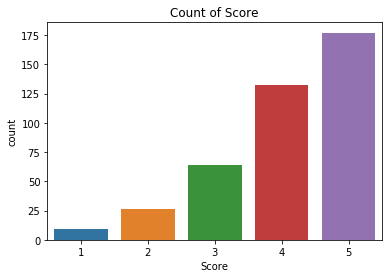

In [26]:
#Counting of Score
vis = sb.countplot(x = "Score", data = lv).set_title('Count of Score')

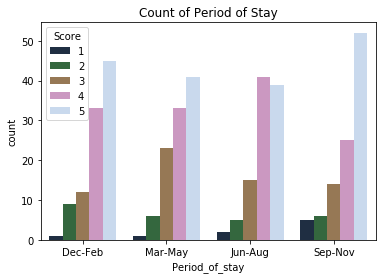

In [27]:
#Counting of Period of Stay
vis = sb.countplot(x = "Period_of_stay", hue = "Score", data = lv, palette = "cubehelix").set_title('Count of Period of Stay')

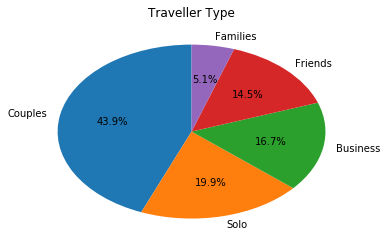

In [28]:
#Percentage of Travller Column
lbl = ['Couples', 'Solo', 'Business', 'Friends', 'Families']
plt.pie(lv.Traveler_type.value_counts(), labels = lbl, startangle = 90, autopct = '%.1f%%')
plt.title("Traveller Type")
plt.show()

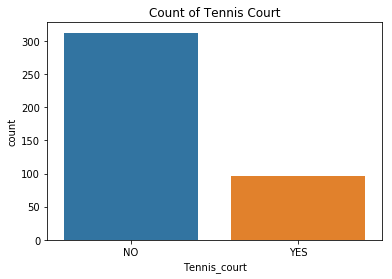

In [29]:
#Count of Tennis COurt
vis = sb.countplot(x = "Tennis_court", data = lv).set_title("Count of Tennis Court")

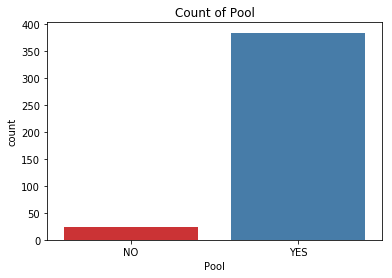

In [30]:
#Count of Pool
vis = sb.countplot(x = "Pool", data = lv, palette = "Set1").set_title("Count of Pool")

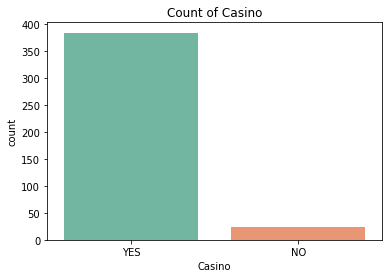

In [31]:
#Count of Casino
vis = sb.countplot(x = "Casino", data = lv, palette = "Set2").set_title("Count of Casino")

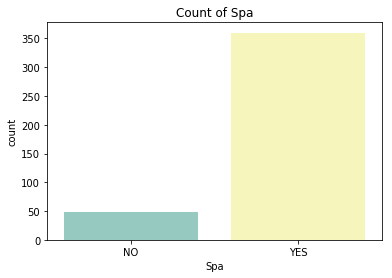

In [32]:
#Count of Spa
vis = sb.countplot(x = "Spa", data = lv, palette = "Set3").set_title("Count of Spa")

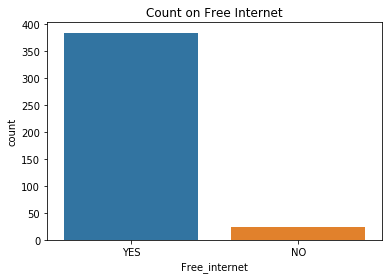

In [33]:
#COunt of Free Internet
vis = sb.countplot(x = "Free_internet", data = lv,).set_title("Count on Free Internet")

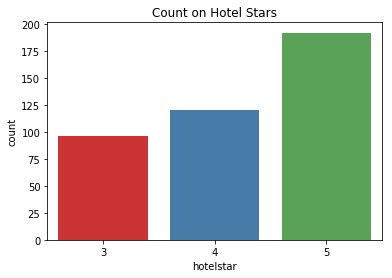

In [34]:
#Count of Hotel Stars
vis = sb.countplot(x = "hotelstar", data = lv, palette = "Set1").set_title("Count on Hotel Stars")

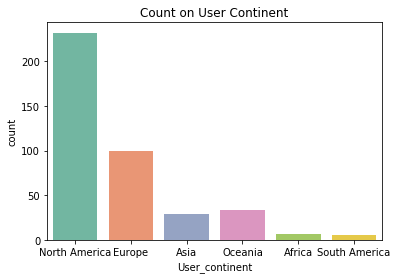

In [35]:
#Count of Users Continent
vis = sb.countplot(x = "User_continent", data = lv, palette = "Set2").set_title("Count on User Continent")

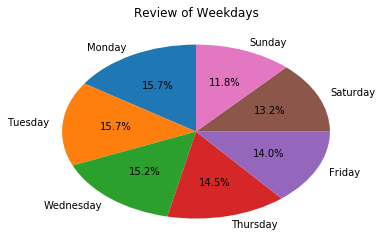

In [36]:
#Percentage of the Reviews of Weekdays
lbl = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.pie(lv.Review_weekday.value_counts(), labels = lbl, startangle = 90, autopct = '%.1f%%')
plt.title("Review of Weekdays")
plt.show()

### 2.2 Relationships between Columns

#### Correlation Matrix

In [37]:
#Creating Correlation Matrix for Categorical columns
lasvegas = trip[['Period_of_stay', 'Traveler_type', 'Pool', 'Tennis_court', 'Spa', 'Casino', 'Free_internet', 'hotelstar', 'User_continent', 'Review_weekday']]
corr = lasvegas.corr()
corr.style.background_gradient(cmap = 'magma').set_precision(2)

,Period_of_stay,Traveler_type,Pool,Tennis_court,Spa,Casino,Free_internet,hotelstar,User_continent,Review_weekday
Period_of_stay,1,-0.042,-0.035,-0.0049,-0.024,0.0022,0.0022,-0.013,-0.034,-0.084
Traveler_type,-0.042,1,-0.11,-0.027,-0.063,0.019,0.038,-0.056,-0.058,0.00079
Pool,-0.035,-0.11,1,0.14,0.68,-0.062,-0.063,0.38,-0.047,0.031
Tennis_court,-0.0049,-0.027,0.14,1,0.2,0.14,0.14,-0.16,0.022,-0.021
Spa,-0.024,-0.063,0.68,0.2,1,0.68,-0.091,0.56,-0.087,-0.0066
Casino,0.0022,0.019,-0.062,0.14,0.68,1,-0.062,0.38,-0.072,-0.04
Free_internet,0.0022,0.038,-0.063,0.14,-0.091,-0.062,1,0.073,0.088,0.0006
hotelstar,-0.013,-0.056,0.38,-0.16,0.56,0.38,0.073,1,-0.031,-0.019
User_continent,-0.034,-0.058,-0.047,0.022,-0.087,-0.072,0.088,-0.031,1,0.022
Review_weekday,-0.084,0.00079,0.031,-0.021,-0.0066,-0.04,0.0006,-0.019,0.022,1


In [38]:
#Creating Correlation Matrix for Numerical Columns
corr = lv.corr()
corr.style.background_gradient(cmap = 'seismic').set_precision(2)

,No_of_reviews,No_of_hotelreviews,Helpful_votes,Score,hotelstar,No_of_rooms,Member_years
No_of_reviews,1,0.59,0.77,-0.025,-0.029,-0.088,0.022
No_of_hotelreviews,0.59,1,0.73,0.013,-0.078,-0.09,0.022
Helpful_votes,0.77,0.73,1,0.019,-0.0056,-0.061,0.023
Score,-0.025,0.013,0.019,1,0.26,-0.05,-0.042
hotelstar,-0.029,-0.078,-0.0056,0.26,1,0.27,0.016
No_of_rooms,-0.088,-0.09,-0.061,-0.05,0.27,1,-0.016
Member_years,0.022,0.022,0.023,-0.042,0.016,-0.016,1


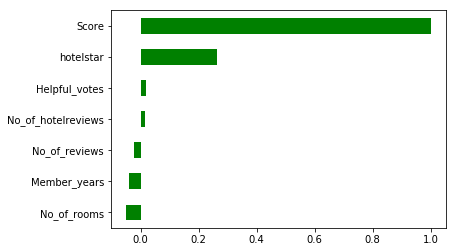

In [39]:
#Correlation Matrix for Score column
lv.corr()['Score'].sort_values().plot(kind = 'barh', color = 'green')

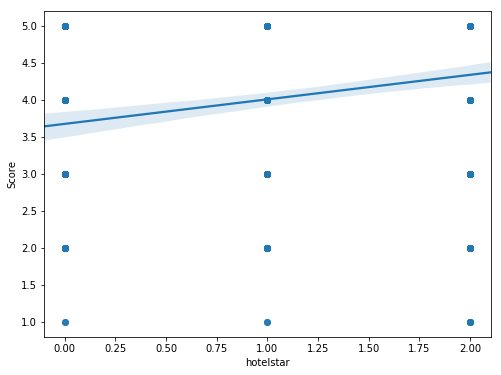

In [40]:
#Linear Regression for Hotel Star vs Score
plt.figure(figsize = (8,6))
sb.regplot(x = "hotelstar", y = "Score", data = trip)

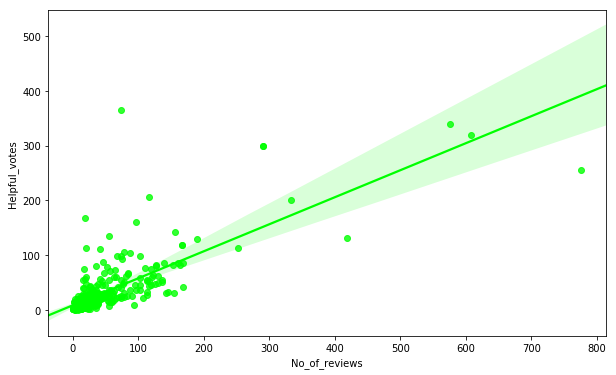

In [41]:
#Linear Regression for Number of Reviews vs Helpful Votes
plt.figure(figsize = (10,6))
sb.regplot(x = "No_of_reviews", y = "Helpful_votes", data = trip, color = 'lime') 

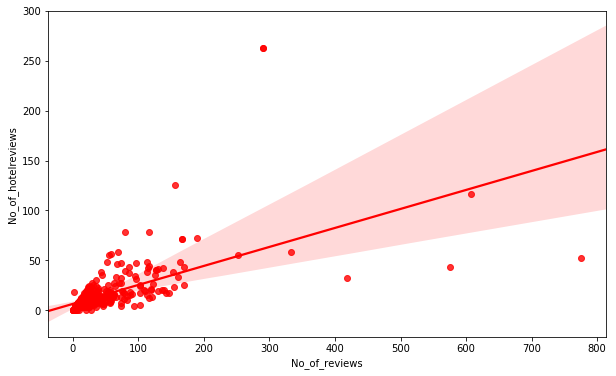

In [42]:
#Linear Regression for Number of Reviews vs Number of Hotel Reviews
plt.figure(figsize=(10,6))
sb.regplot(x = "No_of_reviews", y = "No_of_hotelreviews", data = trip, color = 'red') 

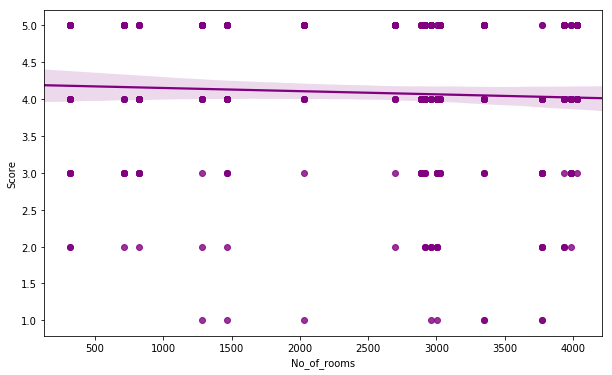

In [43]:
#Linear Regression for Number of Rooms vs Score
plt.figure(figsize = (10,6))
sb.regplot(x = "No_of_rooms", y = "Score", data = trip, color = 'purple')

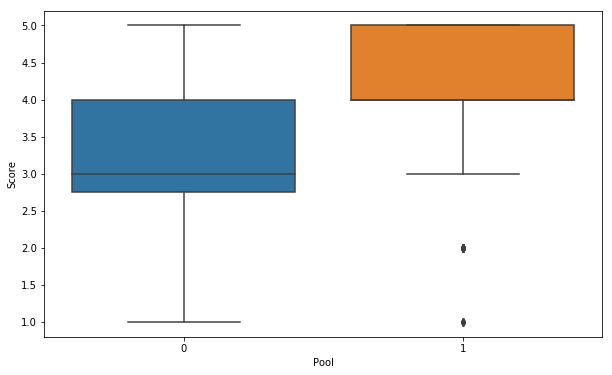

In [44]:
#Pool vs Score
plt.figure(figsize=(10,6))
sb.boxplot(x = "Pool", y = "Score", data = trip) 

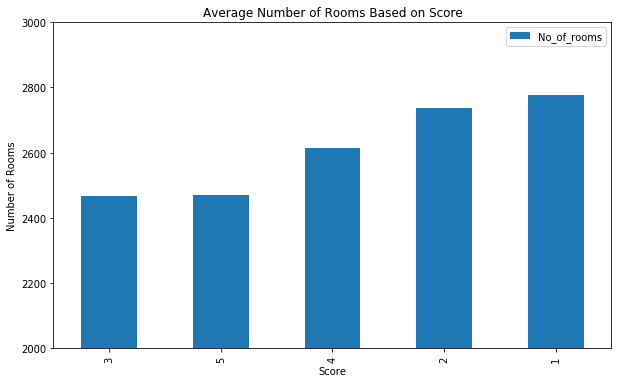

In [45]:
#Average Number of Rooms based on Score
avg = trip[['No_of_rooms','Score']]
avg.groupby("Score").mean().sort_values("No_of_rooms", ascending = True).plot.bar(title = 'Average Number of Rooms Based on Score', figsize = (10,6))
plt.xlabel('Score')
plt.ylabel('Number of Rooms')
plt.ylim(2000,3000) 
plt.show()

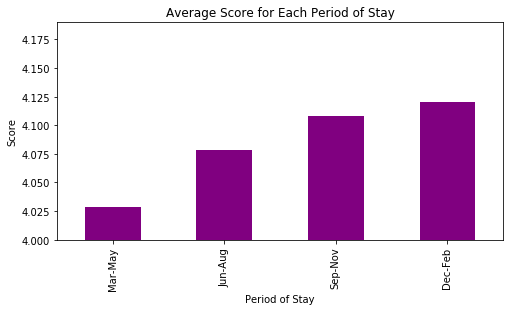

In [46]:
#Average Score based on Period of Stay
lv.groupby("Period_of_stay").Score.mean().sort_values(ascending = True).plot.bar(title='Average Score for Each Period of Stay', figsize = (8,4), color='purple')
plt.ylim(4,4.19)
plt.ylabel("Score")
plt.xlabel("Period of Stay")
plt.show()

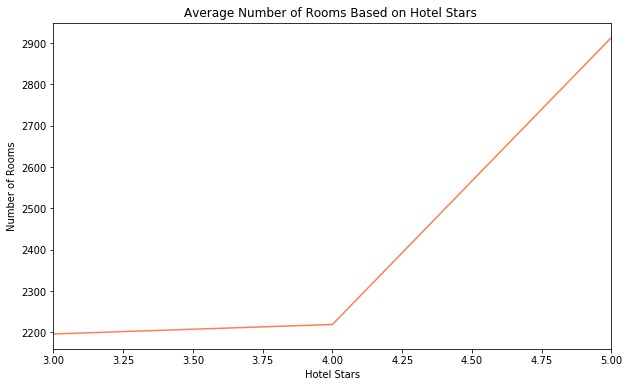

In [47]:
#Average Number of Rooms based on Hotel Stars
lv.groupby("hotelstar").No_of_rooms.mean().sort_values(ascending = False).plot.line(title='Average Number of Rooms Based on Hotel Stars ', color='coral', figsize = (10,6))
plt.ylabel("Number of Rooms")
plt.xlabel("Hotel Stars")
plt.show()

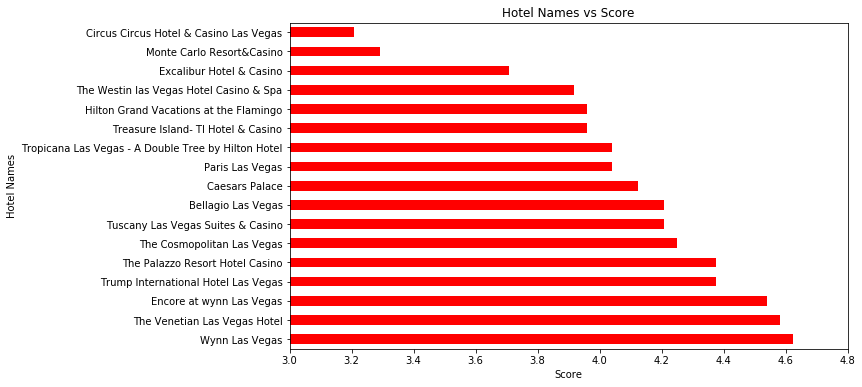

In [48]:
#Hotel Names vs Score
lv.groupby("Hotel_name").Score.mean().sort_values(ascending = False).plot.barh(title='Hotel Names vs Score', color='Red', figsize = (10,6))
plt.xlim(3,4.8)
plt.xlabel("Score")
plt.ylabel("Hotel Names")
plt.show()

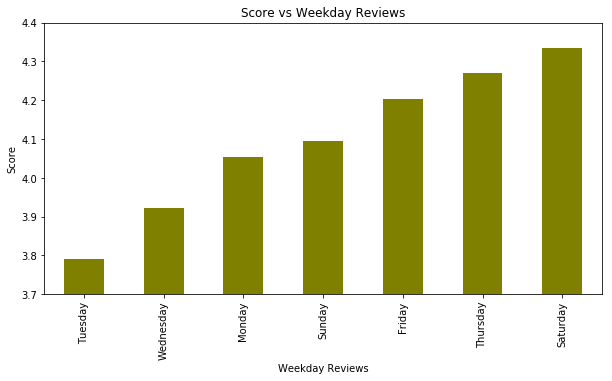

In [49]:
#Score vs Weekday Reviews
lv.groupby("Review_weekday").Score.mean().sort_values().plot.bar(title='Score vs Weekday Reviews', color='olive', figsize = (10,5))
plt.ylim(3.7,4.4)
plt.xlabel("Weekday Reviews")
plt.ylabel("Score")
plt.show()

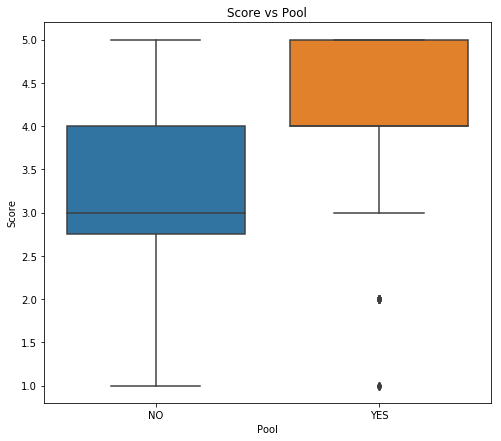

In [50]:
#Score vs Pool
plt.rcParams['figure.figsize'] = (8,7)
vis = sb.boxplot(x = "Pool", y = "Score", data = lv)
plt.title("Score vs Pool")
plt.show()

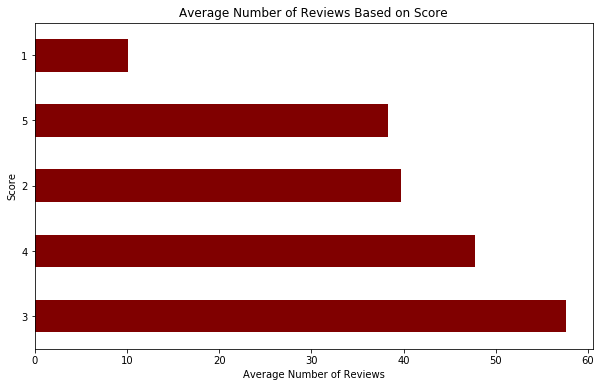

In [51]:
#Average Number of Reviews based on Score
lv.groupby("Score").No_of_reviews.mean().sort_values(ascending = False).plot.barh(title = 'Average Number of Reviews Based on Score', color = 'maroon', figsize = (10,6))
plt.xlabel("Average Number of Reviews")
plt.ylabel("Score")
plt.show()

### Task 3: DATA MODELLING

In [52]:
x1 = trip
x1 = x1.drop(['Score'], axis = 1)
y1 = trip['Score']

#Checking the Shapes
print'Shape of x1:', x1.shape
print'Shape of y1:', y1.shape

Shape of x1: (408, 19)
Shape of y1: (408,)


### SUITE 1: 50% for Training and 50% for Testing

In [53]:
#Splitting data for Training and Testing dataset for Suite 1
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.5, random_state = 0)

# checking the shapes
print 'Shape of x_train:', x_train.shape
print 'Shape of y_train:', y_train.shape
print 'Shape of x_test:', x_test.shape
print 'Shape of y_test:', y_test.shape

Shape of x_train: (204, 19)
Shape of y_train: (204,)
Shape of x_test: (204, 19)
Shape of y_test: (204,)


#### Random Forest Classifier

Training Accuracy : 0.9950980392156863
Testing Accuracy : 0.38235294117647056


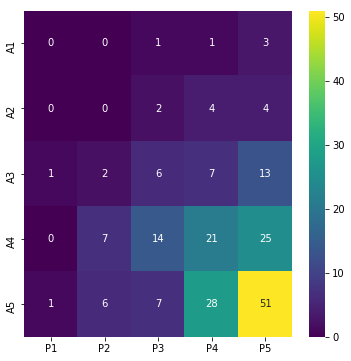

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        10
           3       0.20      0.21      0.20        29
           4       0.34      0.31      0.33        67
           5       0.53      0.55      0.54        93

   micro avg       0.38      0.38      0.38       204
   macro avg       0.22      0.21      0.21       204
weighted avg       0.38      0.38      0.38       204



In [54]:
#Using Random Forest Classification model for Training and Testing
model = RandomForestClassifier(random_state = 0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
rf_training_score = round(model.score(x_train, y_train)*100, 2)
rf_testing_score = round(model.score(x_test, y_test)*100, 2)

# evaluating the model
print'Training Accuracy :', model.score(x_train, y_train)
print'Testing Accuracy :', model.score(x_test, y_test)

# confusion matrix
cfm = confusion_matrix(y_test, y_pred)
confusionmatrix = pan.DataFrame(data=cfm, columns = ['P1','P2','P3','P4','P5'], index = ['A1','A2','A3','A4','A5'])
plt.rcParams['figure.figsize'] = (6, 6)
sb.heatmap(confusionmatrix, annot = True, fmt = 'd', cmap = 'viridis')
plt.show()

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

#### Decision Tree Classifier

Training Accuracy : 1.0
Testing Accuracy : 0.3333333333333333
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.06      0.20      0.09        10
           3       0.13      0.14      0.13        29
           4       0.29      0.25      0.27        67
           5       0.58      0.48      0.53        93

   micro avg       0.33      0.33      0.33       204
   macro avg       0.21      0.22      0.20       204
weighted avg       0.38      0.33      0.35       204



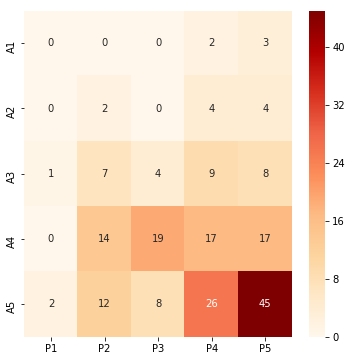

In [55]:
#Using Decision Tree Classification for Training and Testing
model =  DecisionTreeClassifier(random_state = 0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
dt_training_score = round(model.score(x_train, y_train)*100, 2)
dt_testing_score = round(model.score(x_test, y_test)*100, 2)

#Evaluating the model
print'Training Accuracy :', model.score(x_train, y_train)
print'Testing Accuracy :', model.score(x_test, y_test)

#Confusion Matrix
cfm = confusion_matrix(y_test, y_pred)
confusionmatrix = pan.DataFrame(data = cfm, columns = ['P1','P2','P3','P4','P5'], index = ['A1','A2','A3','A4','A5'])
plt.rcParams['figure.figsize'] = (6, 6)
sb.heatmap(confusionmatrix, annot = True, fmt = 'd', cmap = 'OrRd')

#Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

('RF', 0.36872506578388936)
('DT', 0.3929717341482048)
[array([0.31428571, 0.36764706, 0.42424242]), array([0.37142857, 0.35294118, 0.45454545])]


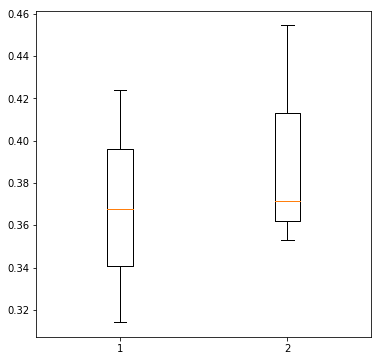

In [56]:
#Making a list of classification models
models = []

def classification_Models(x_train,x_test, y_train, y_test ):
    models.append( ('RF', RandomForestClassifier(random_state = 0)) )
    models.append( ('DT', DecisionTreeClassifier(random_state = 0)) )
 
    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, x_train, y_train,  
                                     scoring = 'accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(x_train,x_test, y_train, y_test)

           model  Training_accuracy  Testing_accuracy
0  Random forest              99.51             38.24
1  Decision Tree             100.00             33.33


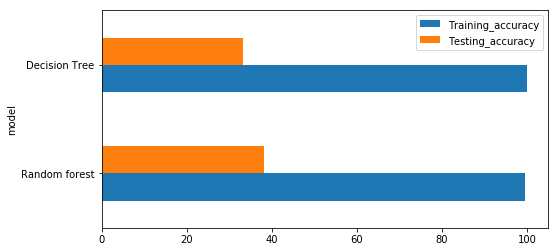

In [57]:
#Comparision between Random Forest and Decision Tree Classfication for Suite 1
suit3 = { 'model': ['Random forest', 'Decision Tree'], 'Training_accuracy': [rf_training_score , dt_training_score], 'Testing_accuracy': [rf_testing_score, dt_testing_score] }
suit3_c = pan.DataFrame (suit3, columns = ['model', 'Training_accuracy', 'Testing_accuracy'])
print(suit3_c)
suit3_c.plot(x="model", kind = "barh", figsize=(8,4))

### SUITE 2: 60% TRAINING and 60% TESTING

In [58]:
#Splitting Dataset for Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.4, random_state = 0)

#Checking the shapes
print 'Shape of x_train :', x_train.shape
print 'Shape of y_train :', y_train.shape
print 'Shape of x_test :', x_test.shape
print 'Shape of y_test :', y_test.shape

Shape of x_train : (244, 19)
Shape of y_train : (244,)
Shape of x_test : (164, 19)
Shape of y_test : (164,)


Training Accuracy : 1.0
Testing Accuracy : 0.3719512195121951
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.07      0.10      0.08        10
           3       0.18      0.17      0.18        23
           4       0.34      0.36      0.35        55
           5       0.52      0.49      0.50        74

   micro avg       0.37      0.37      0.37       164
   macro avg       0.22      0.22      0.22       164
weighted avg       0.38      0.37      0.38       164



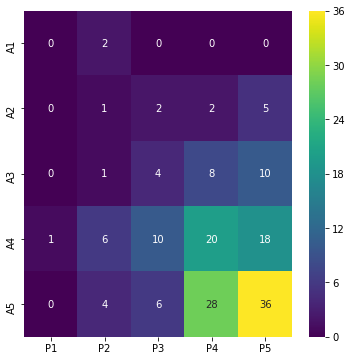

In [59]:
#Using Random Forest Classifier for Training and Testing dataset
model = RandomForestClassifier(random_state = 0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
rf_training_score = round(model.score(x_train, y_train)*100, 2)
rf_testing_score = round(model.score(x_test, y_test)*100, 2)

# evaluating the model
print'Training Accuracy :', model.score(x_train, y_train)
print'Testing Accuracy :', model.score(x_test, y_test)

#Confusion Matrix
cfm = confusion_matrix(y_test, y_pred)
confusionmatrix = pan.DataFrame(data = cfm, columns = ['P1','P2','P3','P4','P5'], index = ['A1','A2','A3','A4','A5'])
plt.rcParams['figure.figsize'] = (6, 6)
sb.heatmap(confusionmatrix ,annot = True, fmt = 'd', cmap = 'viridis')

#Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.36585365853658536
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.05      0.10      0.07        10
           3       0.12      0.17      0.14        23
           4       0.46      0.38      0.42        55
           5       0.53      0.46      0.49        74

   micro avg       0.37      0.37      0.37       164
   macro avg       0.23      0.22      0.22       164
weighted avg       0.41      0.37      0.39       164



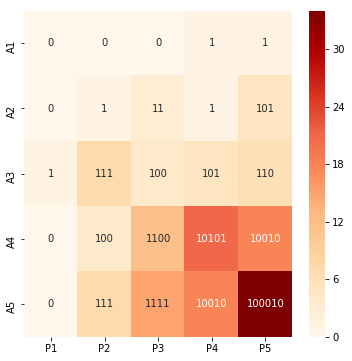

In [60]:
#Using Decision tree Classifier for Training and testing datase
model =  DecisionTreeClassifier(random_state = 0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
dt_training_score = round(model.score(x_train, y_train)*100, 2)
dt_testing_score = round(model.score(x_test, y_test)*100, 2)

# evaluating the model
print'Training Accuracy :', model.score(x_train, y_train)
print'Testing Accuracy :', model.score(x_test, y_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
confusionmatrix = pan.DataFrame(data=cm, columns=['P1','P2','P3','P4','P5'], index=['A1','A2','A3','A4','A5'])
plt.rcParams['figure.figsize'] = (6, 6)
sb.heatmap(confusionmatrix ,annot = True, fmt = 'b', cmap = "OrRd")

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

('RF', 0.443510518756651)
('DT', 0.3643835718378616)
[array([0.4047619 , 0.43209877, 0.49367089]), array([0.4047619 , 0.30864198, 0.37974684])]


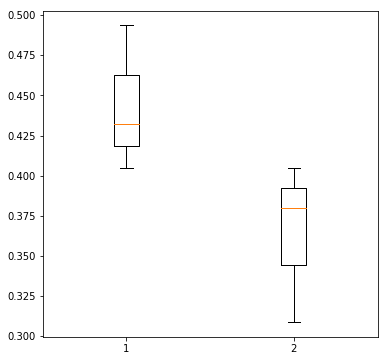

In [61]:
#Making a list of classification models
models = []

def classification_Models(x_train,x_test, y_train, y_test ):
    models.append( ('RF', RandomForestClassifier(random_state = 0)) )
    models.append( ('DT', DecisionTreeClassifier(random_state = 0)) )
 
    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, x_train, y_train,  
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(x_train,x_test, y_train, y_test)

           model  Training_accuracy  Testing_accuracy
0  Random forest              100.0             37.20
1  Decision Tree              100.0             36.59


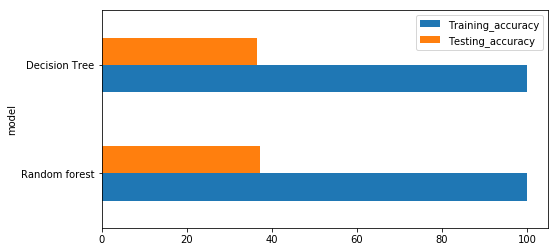

In [62]:
#Comparision between Random Forest and Decision tree Classifiers for Suite 2
suit3 = { 'model': ['Random forest', 'Decision Tree'], 'Training_accuracy': [rf_training_score , dt_training_score], 'Testing_accuracy': [rf_testing_score, dt_testing_score] }
suit3_c = pan.DataFrame (suit3, columns = ['model', 'Training_accuracy', 'Testing_accuracy'])
print(suit3_c)
suit3_c.plot(x="model", kind = "barh", figsize=(8,4))

### SUITE 3: 80% TRAINING and 20% TESTING

In [63]:
#Splitting data for Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

# checking the shapes
print'Shape of x_train :', x_train.shape
print'Shape of y_train :', y_train.shape
print'Shape of x_test :', x_test.shape
print'Shape of y_test :', y_test.shape

Shape of x_train : (326, 19)
Shape of y_train : (326,)
Shape of x_test : (82, 19)
Shape of y_test : (82,)


('Training Accuracy :', 0.9754601226993865)
('Testing Accuracy :', 0.4146341463414634)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         5
           3       0.33      0.13      0.19        15
           4       0.43      0.41      0.42        29
           5       0.47      0.61      0.53        33

   micro avg       0.41      0.41      0.41        82
   macro avg       0.25      0.23      0.23        82
weighted avg       0.40      0.41      0.40        82



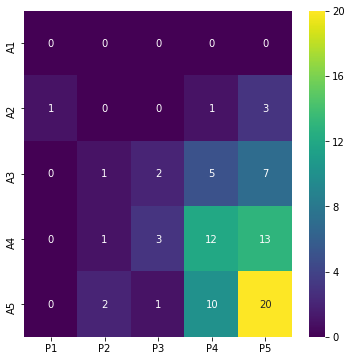

In [64]:
#Using Random FOrest Classifier for Training and Testing dataset
model = RandomForestClassifier(random_state = 0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

rf_training_score = round(model.score(x_train, y_train)*100, 2)
rf_testing_score = round(model.score(x_test, y_test)*100, 2)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cfm = confusion_matrix(y_test, y_pred)
confusionmatrix = pan.DataFrame(data=cfm, columns=['P1','P2','P3','P4','P5'], index=['A1','A2','A3','A4','A5'])
plt.rcParams['figure.figsize'] = (6, 6)
sb.heatmap(confusionmatrix ,annot = True, fmt = 'd', cmap = 'viridis')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.36585365853658536
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         5
           3       0.21      0.20      0.21        15
           4       0.41      0.38      0.39        29
           5       0.50      0.48      0.49        33

   micro avg       0.37      0.37      0.37        82
   macro avg       0.22      0.21      0.22        82
weighted avg       0.38      0.37      0.37        82



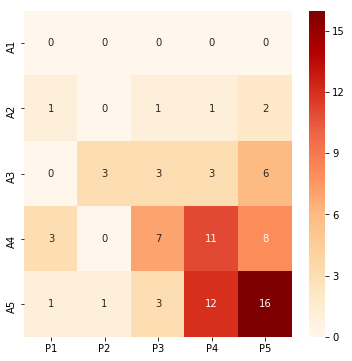

In [65]:
#Using Decision Tree Classifier for Training and Testing datase
model =  DecisionTreeClassifier(random_state = 0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
dt_training_score = round(model.score(x_train, y_train)*100, 2)
dt_testing_score = round(model.score(x_test, y_test)*100, 2)

# evaluating the model
print 'Training Accuracy :', model.score(x_train, y_train)
print 'Testing Accuracy :', model.score(x_test, y_test)

# confusion matrix
cfm = confusion_matrix(y_test, y_pred)
confusionmatrix = pan.DataFrame(data=cfm, columns=['P1','P2','P3','P4','P5'], index=['A1','A2','A3','A4','A5'])
plt.rcParams['figure.figsize'] = (6, 6)
sb.heatmap(confusionmatrix ,annot = True, cmap = "OrRd")

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

('RF', 0.4599887766554433)
('DT', 0.39551066217732883)
[array([0.48181818, 0.46296296, 0.43518519]), array([0.42727273, 0.40740741, 0.35185185])]


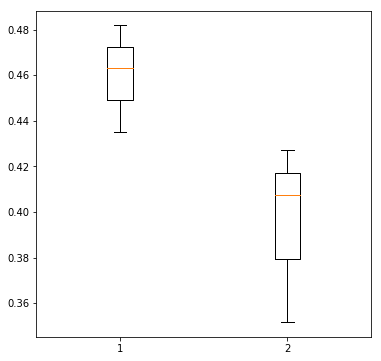

In [66]:
#Making a list of ml classification models
models = []

def classification_Models(x_train,x_test, y_train, y_test ):
    models.append( ('RF', RandomForestClassifier(random_state = 0)) )
    models.append( ('DT', DecisionTreeClassifier(random_state = 0)) )
 
    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, x_train, y_train,  
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(x_train,x_test, y_train, y_test)

           model  Training_accuracy  Testing_accuracy
0  Random forest              97.55             41.46
1  Decision Tree             100.00             36.59


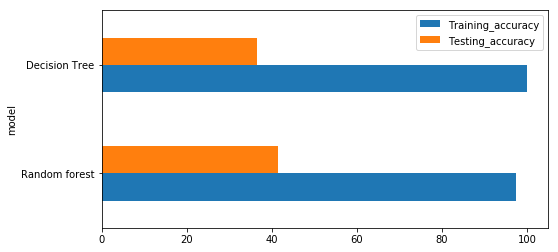

In [67]:
#Comparision between Random Forest and Decision Tree Classifiers for Suite 3
suit3 = { 'model': ['Random forest', 'Decision Tree'], 'Training_accuracy': [rf_training_score , dt_training_score], 'Testing_accuracy': [rf_testing_score, dt_testing_score] }
suit3_c = pan.DataFrame (suit3, columns = ['model', 'Training_accuracy', 'Testing_accuracy'])
print(suit3_c)
suit3_c.plot(x="model", kind = "barh", figsize=(8,4))